# S.I.R. Model

- Susceptible
- Infectious
- Recovered

## Compartmental Models

- Divide population into compartments based on some state or characteristic
- A person is in one and only one compartment at a time

## The SIR Model

We track the following three compartments, which must sum to N(t), the total population at time t.

$$S(t) + I(t) + R(t) = N(t)$$

- Inside a compartment, all individuals are assumed to be homogeneous and have the same characteristics.

This is a gross simplification of real-world dynamics. In reality, individuals may move between compartments in more complex ways, and factors such as age, social behavior, and vaccination status can influence disease spread.

- If an S comes into contact with only other S individuals, or R individuals, they remain S.
- Contact with an I individual is required to go from S to I.

- An S <-> I contact is necessary, but not always sufficient for transmission.

- To calculate whether a person becomes I, we need a rate of *contact* and *probability* that a contact causes an infection.

## Key Assumption: "well mixed" contact

- The probability that a random person is susceptible is equal to the number of susceptible individuals in the population: $\frac{S(t)}{N(t)}$

- The probability that a random person is infectious: $\frac{I(t)}{N(t)}$

- The probability that a random person is recovered: $\frac{R(t)}{N(t)}$

Contacts occur at rate $c$.

Therefore, susceptible contacts occur at a rate: $c \cdot \frac{S(t)}{N(t)}$
Infectious contacts occur at a rate: $c \cdot \frac{I(t)}{N(t)}$
Recovered contacts occur at a rate: $c \cdot \frac{R(t)}{N(t)}$

$$c \cdot S \cdot \frac{I(t)}{N(t)} = \text{rate of S-to-I contacts per time}$$

Let p be the probability that a transmission actually takes place given a single S<->I contact.

Rate at which new infections occur in the whole population is:

$$c \cdot p \cdot \frac{I(t)}{N(t)} \cdot S(t)$$

This is equal to *incidence*:

$$\frac{dS}{dt} = -(c \cdot p \cdot \frac{I(t)}{N(t)}) \cdot S(t)$$

The per capita rate of new infection is (force of infection):

$$\frac{cpI(t)}{N(t)}$$

This can also sometimes be written as:

$$\frac{dS}{dt} = -\lambda(t) S = \dot{S}$$

where $\lambda(t) = c \cdot p \cdot \frac{I(t)}{N(t)} = \frac{\beta I(t)}{N(t)}$.

It's often useful to express $p \cdot c$ as a single parameter:

$$\beta = c \cdot p$$

We can also assume that people in the I compartment recover with rate: $\gamma$

$\dot{I}$ = (incidence - recovery) = $\frac{\beta SI}{N} - \gamma I$

$\dot{R}$ = recovery = $\gamma I$

$\dot{S} + \dot{I} + \dot{R} = 0$ = $\frac{d}{dt}(S + I + R) = 0$ = $\frac{d}{dt}(N) = 0$

Let's let $s  = \frac{S}{N}$, $i = \frac{I}{N}$, and $r = \frac{R}{N}$ be the fractions of the population in each compartment.

Then we can write the system of equations in terms of these fractions:

$$\dot{s} = \frac{\dot{S}}{N}$$
$$\dot{i} = \frac{\dot{I}}{N}$$
$$\dot{r} = \frac{\dot{R}}{N}$$

Let's write them normalized:

$$\dot{s} = -\beta s i$$
$$\dot{i} = \beta s i - \gamma i$$
$$\dot{r} = \gamma i$$

When normalized:

$$s + i + r = 1$$

due to the conservation of total population.

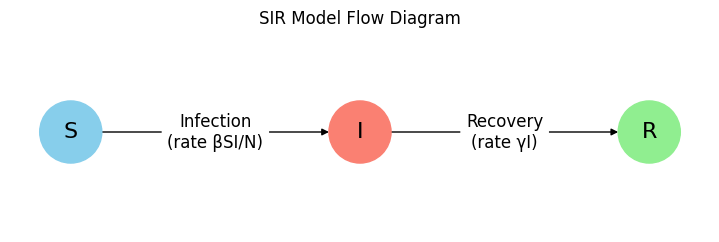

In [ ]:
# SIR flow diagram using matplotlib and networkx
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_nodes_from(['S', 'I', 'R'])
G.add_edge('S', 'I', label='Infection\n(rate βSI/N)')
G.add_edge('I', 'R', label='Recovery\n(rate γI)')

pos = {'S': (0, 0), 'I': (2, 0), 'R': (4, 0)}
labels = {node: node for node in G.nodes()}
edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}

plt.figure(figsize=(7,2))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color=['skyblue','salmon','lightgreen'], font_size=16)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
plt.title("SIR Model Flow Diagram")
plt.axis('off')
plt.show()

## Euler's Method

$$\Delta y = \Delta t \cdot \frac{dy}{dt}$$

Change in y is approximately equal to y's slope times the change in time of $\Delta t = 1 \text{ day}$:

$$\Delta y \approx \frac{dy}{dt} \cdot \Delta t$$

This is the basic idea behind Euler's method: we use the slope at the current point to estimate the value of the function at the next point.

$$y_{n+1} = y_n + \Delta y = y_n + \Delta t \cdot \text{slope}$$

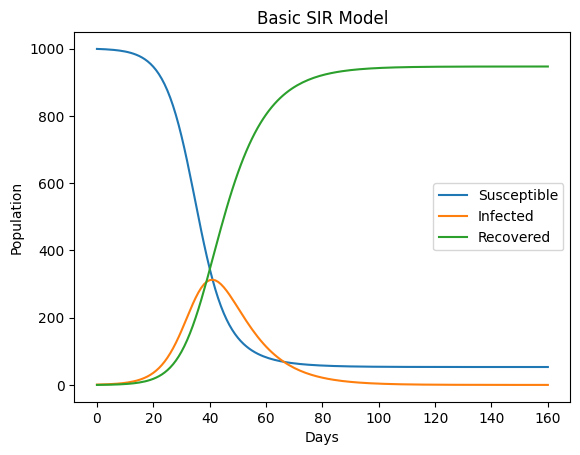

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
N = 1000        # we let N represent the total population
I0 = 1          # we let I0 represent the initial infected
R0 = 0          # R0 represents the recovered population
S0 = N - I0 - R0  # S0 is calculated as the initial susceptible population (S0 = N - I0 - R0 = 999)

beta = 0.3      # infection rate
gamma = 0.1     # recovery rate
days = 160      # simulation days (length of the simulation)

# SIR model differential EQs
def sir_step(S, I, R, beta, gamma, N):
    new_infected = beta * S * I / N
    new_recovered = gamma * I
    S_next = S - new_infected
    I_next = I + new_infected - new_recovered
    R_next = R + new_recovered
    return S_next, I_next, R_next

S, I, R = [S0], [I0], [R0]

for _ in range(days):
    s, i, r = sir_step(S[-1], I[-1], R[-1], beta, gamma, N)
    S.append(s)
    I.append(i)
    R.append(r)

plt.plot(S, label='Susceptible')
plt.plot(I, label='Infected')
plt.plot(R, label='Recovered')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.title('Basic SIR Model')
plt.show()